In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from scripts.insar_conversion import convert_insar_to_u
import numpy as np
from scipy.optimize import curve_fit

In [2]:
insar_asc_u_corrected = r'insar/sentinel1_asc_t088_limburg_u_Kerkrade.csv'

insar_asc_u = pd.read_csv(insar_asc_u_corrected, sep=',')

In [3]:
# # Extract the dates from the .csv file
insar_dates = pd.to_datetime(insar_asc_u.filter(regex='^u_20').columns, format='u_%Y%m%d')

# # Extract the displacement data from the .csv file
disp_asc_u = insar_asc_u.filter(regex='^u_20')

# Calculate the nr of days between the observations where the first observations is day 0
days = (insar_dates - insar_dates[0]).days
years = days/365

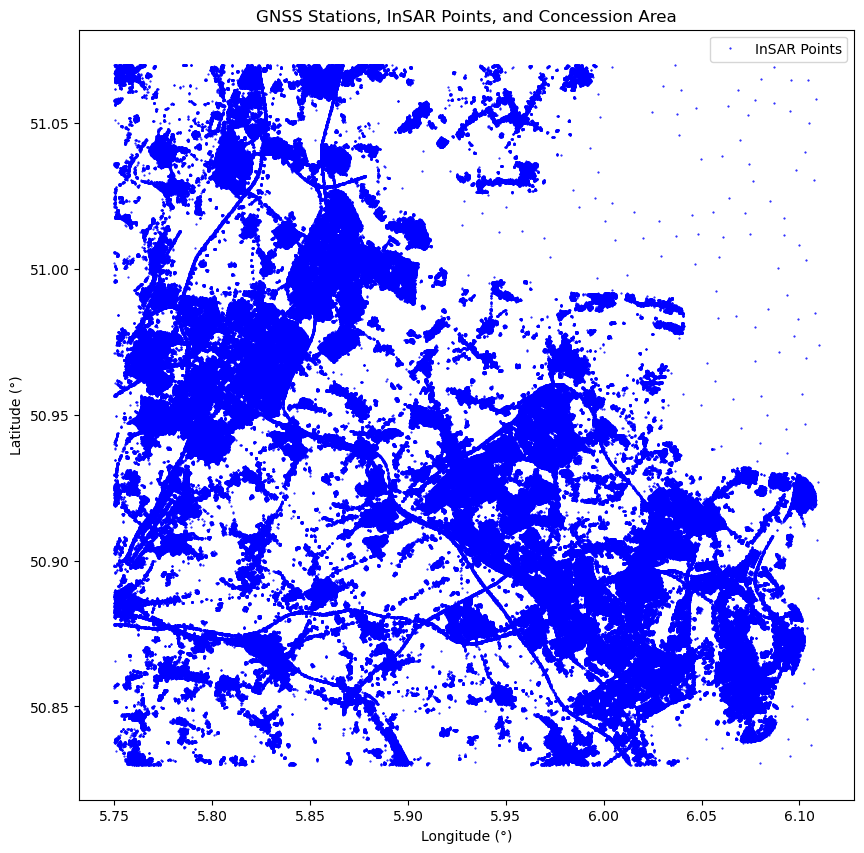

In [4]:
# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 10))

# --- Plot InSAR points ---
ax.plot(
    insar_asc_u.pnt_lon,
    insar_asc_u.pnt_lat,
    ".",
    color="blue",
    markersize=1,
    alpha=1,
    label="InSAR Points",
    zorder=3
)


# --- Labels & title ---
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_title("GNSS Stations, InSAR Points, and Concession Area")
ax.legend()

plt.show()
